In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [24]:
#Importing the dataset
dataset = pd.read_excel('아파트매매가격지수_경기도_10년.xlsx',index_col = 0)

data = dataset.T
data

행정구역별,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,고양시,...,용인시,파주시,이천시,안성시,김포시,화성시,광주시,양주시,포천시,여주시
2013-01-01,63.4,67.8,77.7,60.5,68.1,53.0,92.6,92.6,66.8,69.5,...,68.8,82.3,89.2,92.6,71.1,73.0,82.4,82.0,93.6,102.8
2013-02-01,63.3,67.2,77.4,60.2,67.7,52.9,92.5,90.9,66.6,69.0,...,68.5,81.9,89.4,92.8,70.9,72.9,82.0,81.7,93.6,102.8
2013-03-01,63.2,66.9,76.9,60.0,67.4,52.6,92.4,90.1,66.3,68.6,...,68.4,81.6,89.7,92.8,70.8,72.8,81.9,81.4,93.6,102.7
2013-04-01,63.3,67.1,76.4,59.8,67.4,52.6,92.4,90.0,66.3,68.1,...,68.4,80.6,90.1,93.5,70.7,73.2,82.3,81.7,93.9,102.7
2013-05-01,63.4,67.5,76.4,59.6,67.6,52.9,92.4,89.8,66.6,68.1,...,68.5,80.7,90.4,93.8,71.0,73.6,82.3,81.9,94.7,103.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,108.4,104.3,106.5,110.5,108.7,106.7,111.7,107.3,109.3,106.7,...,106.2,105.9,107.8,112.6,104.7,110.9,106.8,108.5,107.3,105.2
2021-11-01,109.5,104.8,107.2,111.7,110.2,107.3,113.2,107.7,110.7,107.6,...,107.1,106.9,110.3,114.8,105.3,111.6,107.9,109.5,108.4,106.6
2021-12-01,109.8,105.1,107.4,112.0,110.8,107.4,114.1,107.5,111.2,108.0,...,107.5,107.2,112.3,116.1,105.6,111.6,108.4,109.8,109.0,107.2
2022-01-01,109.8,105.1,107.4,111.8,110.8,107.3,114.3,107.5,111.3,108.1,...,107.6,107.5,113.3,116.9,105.6,111.5,108.7,109.8,109.2,107.1


In [25]:
seq_len = 50
sequence_length = seq_len + 1
ratio = data['수원시'].values

result = []
for index in range(len(ratio) - sequence_length):
    result.append(ratio[index: index + sequence_length])

In [26]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((53, 50, 1), (6, 50, 1))

In [49]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, activation = 'tanh', input_shape=(50, 1)))

model.add(LSTM(64,activation = 'relu' ,return_sequences=False))

model.add(Dense(1, activation='tanh'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_16 (LSTM)              (None, 64)                29440     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(x_train, y_train,
    batch_size=10,
    epochs=20)

Epoch 1/20
6/6 [==============================] - 0s 61ms/step - loss: 0.0013
Epoch 2/20
6/6 [==============================] - 0s 54ms/step - loss: 0.0011
Epoch 3/20
6/6 [==============================] - 0s 57ms/step - loss: 0.0017
Epoch 4/20
6/6 [==============================] - 0s 55ms/step - loss: 0.0015
Epoch 5/20
6/6 [==============================] - 0s 73ms/step - loss: 0.0012
Epoch 6/20
6/6 [==============================] - 0s 75ms/step - loss: 0.0013
Epoch 7/20
6/6 [==============================] - 0s 63ms/step - loss: 9.9142e-04
Epoch 8/20
6/6 [==============================] - 0s 59ms/step - loss: 0.0016
Epoch 9/20
6/6 [==============================] - 0s 60ms/step - loss: 0.0011
Epoch 10/20
6/6 [==============================] - 0s 61ms/step - loss: 0.0012
Epoch 11/20
6/6 [==============================] - 0s 64ms/step - loss: 0.0010
Epoch 12/20
6/6 [==============================] - 0s 62ms/step - loss: 0.0014
Epoch 13/20
6/6 [==============================] - 0s 74m

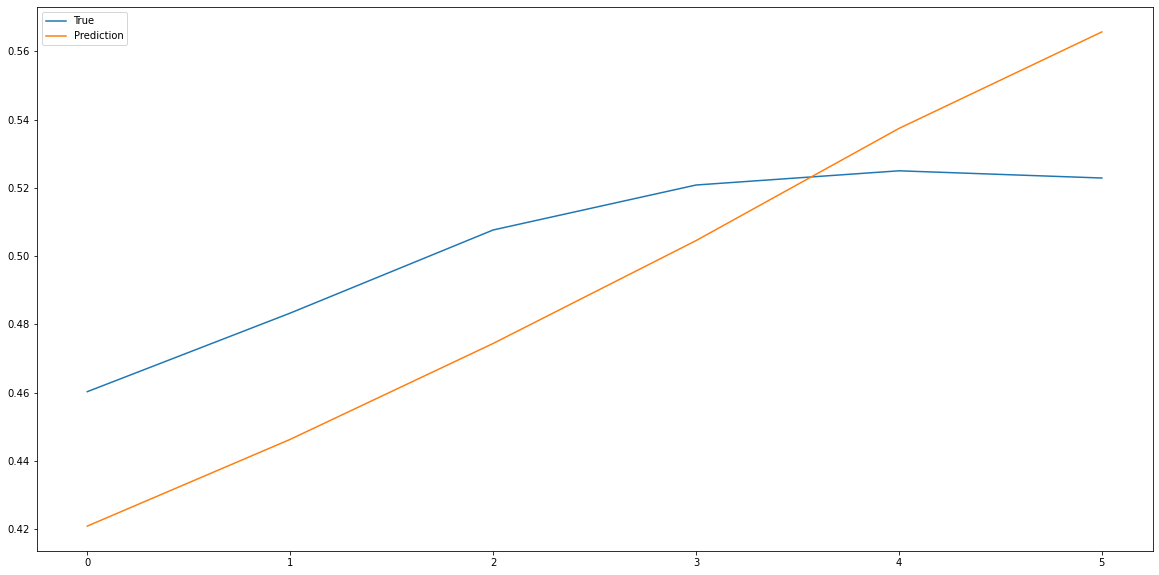

In [54]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()